In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pl
import seaborn as sns

%matplotlib inline 

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

sample_submission = pd.read_csv("sample_submission.csv")

In [3]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [5]:
sample_submission.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,NaN
1,FDW14,OUT017,NaN
2,NCN55,OUT010,NaN
3,FDQ58,OUT017,NaN
4,FDY38,OUT027,NaN


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


In [7]:
train['Type'] = 'Train'
test['Type'] = 'Test'

full_data = pd.concat([train, test], axis = 0)

In [8]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 0 to 5680
Data columns (total 13 columns):
Item_Fat_Content             14204 non-null object
Item_Identifier              14204 non-null object
Item_MRP                     14204 non-null float64
Item_Outlet_Sales            8523 non-null float64
Item_Type                    14204 non-null object
Item_Visibility              14204 non-null float64
Item_Weight                  11765 non-null float64
Outlet_Establishment_Year    14204 non-null int64
Outlet_Identifier            14204 non-null object
Outlet_Location_Type         14204 non-null object
Outlet_Size                  10188 non-null object
Outlet_Type                  14204 non-null object
Type                         14204 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 1.5+ MB


In [9]:
pd.unique(full_data["Item_Fat_Content"])

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [10]:
pd.unique(full_data["Item_Type"])

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [11]:
full_data.loc[full_data['Item_Fat_Content'] == 'LF', 'Item_Fat_Content'] = 'Low Fat'
full_data.loc[full_data['Item_Fat_Content'] == 'low fat', 'Item_Fat_Content'] = 'Low Fat'
full_data.loc[full_data['Item_Fat_Content'] == 'reg', 'Item_Fat_Content'] = 'Regular'

In [12]:
pd.unique(full_data["Item_Fat_Content"])

array(['Low Fat', 'Regular'], dtype=object)

In [13]:
unique_item = pd.unique(full_data["Item_Identifier"])

In [14]:
for item in unique_item:
    fill = full_data.loc[full_data["Item_Identifier"] == item, "Item_Weight"].mode()[0]
    full_data.ix[full_data["Item_Identifier"] == item, 
                 "Item_Weight"] = full_data.ix[full_data["Item_Identifier"] == item, "Item_Weight"].fillna(fill)

In [15]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 0 to 5680
Data columns (total 13 columns):
Item_Fat_Content             14204 non-null object
Item_Identifier              14204 non-null object
Item_MRP                     14204 non-null float64
Item_Outlet_Sales            8523 non-null float64
Item_Type                    14204 non-null object
Item_Visibility              14204 non-null float64
Item_Weight                  14204 non-null float64
Outlet_Establishment_Year    14204 non-null int64
Outlet_Identifier            14204 non-null object
Outlet_Location_Type         14204 non-null object
Outlet_Size                  10188 non-null object
Outlet_Type                  14204 non-null object
Type                         14204 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 1.5+ MB


In [16]:
unique_outlet = pd.unique(full_data["Outlet_Identifier"])

In [17]:
for outlet in unique_outlet:
    fill = pd.unique(full_data.loc[full_data["Outlet_Identifier"] == outlet, "Outlet_Size"])
    print outlet
    print fill

OUT049
['Medium']
OUT018
['Medium']
OUT010
[nan]
OUT013
['High']
OUT027
['Medium']
OUT045
[nan]
OUT017
[nan]
OUT046
['Small']
OUT035
['Small']
OUT019
['Small']


In [18]:
full_data = full_data.drop("Outlet_Size", axis = 1)

In [19]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 0 to 5680
Data columns (total 12 columns):
Item_Fat_Content             14204 non-null object
Item_Identifier              14204 non-null object
Item_MRP                     14204 non-null float64
Item_Outlet_Sales            8523 non-null float64
Item_Type                    14204 non-null object
Item_Visibility              14204 non-null float64
Item_Weight                  14204 non-null float64
Outlet_Establishment_Year    14204 non-null int64
Outlet_Identifier            14204 non-null object
Outlet_Location_Type         14204 non-null object
Outlet_Type                  14204 non-null object
Type                         14204 non-null object
dtypes: float64(4), int64(1), object(7)
memory usage: 1.4+ MB


In [20]:
full_data.isnull().any()

Item_Fat_Content             False
Item_Identifier              False
Item_MRP                     False
Item_Outlet_Sales             True
Item_Type                    False
Item_Visibility              False
Item_Weight                  False
Outlet_Establishment_Year    False
Outlet_Identifier            False
Outlet_Location_Type         False
Outlet_Type                  False
Type                         False
dtype: bool

In [21]:
full_data = full_data.set_index(["Item_Identifier", "Outlet_Identifier"], drop = True)
print full_data.shape

(14204, 10)


In [22]:
taget = "Item_Outlets_Sales"

In [23]:
numeric_f = full_data.dtypes[full_data.dtypes != "object"].index
numeric_f = numeric_f.drop(["Item_Outlet_Sales"])
print "numerical features: ", numeric_f.values

numerical features:  ['Item_MRP' 'Item_Visibility' 'Item_Weight' 'Outlet_Establishment_Year']


In [24]:
factor_f = full_data.dtypes[full_data.dtypes == "object"].index
factor_f = factor_f.drop(["Type"])
print "categorical features: ", factor_f.values

categorical features:  ['Item_Fat_Content' 'Item_Type' 'Outlet_Location_Type' 'Outlet_Type']


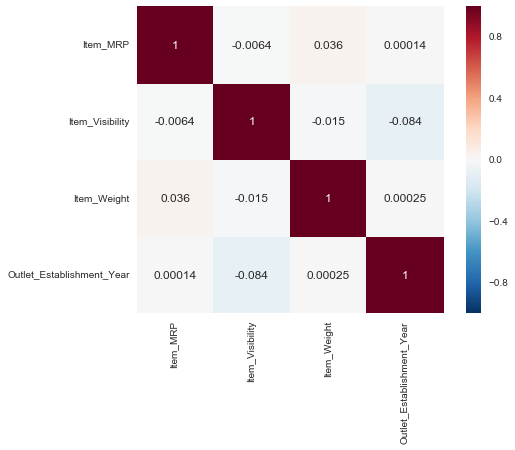

In [25]:
# visulize the correlation matrix of numerical features 

cm = np.corrcoef(full_data[numeric_f].values.T)

sns.set(font_scale = 1)
hm = sns.heatmap(cm,
                cbar = True,
                annot = True,
                square = True,
                yticklabels = numeric_f, xticklabels = numeric_f)

In [26]:
full_data.shape

(14204, 10)

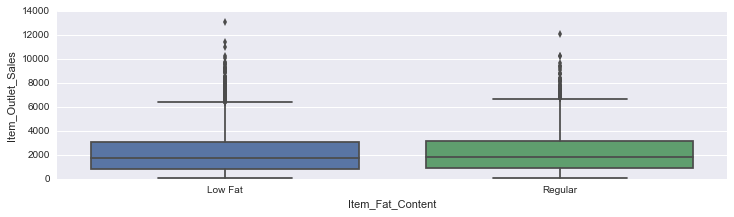

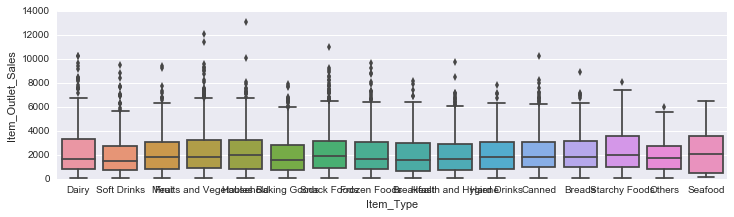

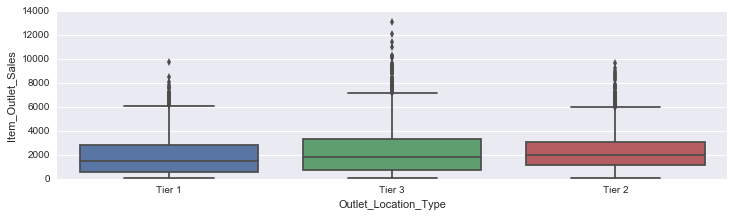

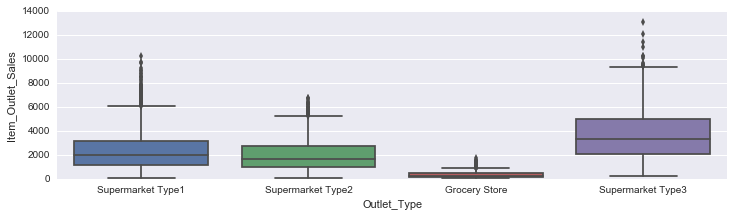

In [27]:
for feature in factor_f:
    fig, ax = pl.subplots(figsize = (12, 3))
    feature = sns.boxplot(x = feature, y = "Item_Outlet_Sales", data = full_data[full_data["Type"] == "Train"], ax = ax)

In [28]:
full_data = pd.get_dummies(full_data)

In [29]:
train = full_data[full_data["Type_Train"] == 1]
train_X = train.drop(["Item_Outlet_Sales", "Type_Test", "Type_Train"], axis = 1)
train_y = full_data.loc[full_data["Type_Train"] == 1, "Item_Outlet_Sales"]
test = full_data[full_data["Type_Test"] == 1 ]
test_X = test.drop(["Item_Outlet_Sales", "Type_Test", "Type_Train"], axis = 1)

In [30]:
train_X.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 8523 entries, (FDA15, OUT049) to (DRG01, OUT046)
Data columns (total 29 columns):
Item_MRP                           8523 non-null float64
Item_Visibility                    8523 non-null float64
Item_Weight                        8523 non-null float64
Outlet_Establishment_Year          8523 non-null int64
Item_Fat_Content_Low Fat           8523 non-null float64
Item_Fat_Content_Regular           8523 non-null float64
Item_Type_Baking Goods             8523 non-null float64
Item_Type_Breads                   8523 non-null float64
Item_Type_Breakfast                8523 non-null float64
Item_Type_Canned                   8523 non-null float64
Item_Type_Dairy                    8523 non-null float64
Item_Type_Frozen Foods             8523 non-null float64
Item_Type_Fruits and Vegetables    8523 non-null float64
Item_Type_Hard Drinks              8523 non-null float64
Item_Type_Health and Hygiene       8523 non-null float64
Item_Type_House

In [31]:
train_y.head()

Item_Identifier  Outlet_Identifier
FDA15            OUT049               3735.1380
DRC01            OUT018                443.4228
FDN15            OUT049               2097.2700
FDX07            OUT010                732.3800
NCD19            OUT013                994.7052
Name: Item_Outlet_Sales, dtype: float64

In [51]:
test_X.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 5681 entries, (FDW58, OUT049) to (FDU37, OUT045)
Data columns (total 29 columns):
Item_MRP                           5681 non-null float64
Item_Visibility                    5681 non-null float64
Item_Weight                        5681 non-null float64
Outlet_Establishment_Year          5681 non-null int64
Item_Fat_Content_Low Fat           5681 non-null float64
Item_Fat_Content_Regular           5681 non-null float64
Item_Type_Baking Goods             5681 non-null float64
Item_Type_Breads                   5681 non-null float64
Item_Type_Breakfast                5681 non-null float64
Item_Type_Canned                   5681 non-null float64
Item_Type_Dairy                    5681 non-null float64
Item_Type_Frozen Foods             5681 non-null float64
Item_Type_Fruits and Vegetables    5681 non-null float64
Item_Type_Hard Drinks              5681 non-null float64
Item_Type_Health and Hygiene       5681 non-null float64
Item_Type_House

In [35]:
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import KFold
from sklearn.cross_validation import train_test_split

def performance_matrix(y_actual, y_predict):
    return np.sqrt(mean_squared_error(y_actual, y_predict))

scoring_function = make_scorer(performance_matrix, greater_is_better = False)
X_train, X_test, y_train, y_test = train_test_split(train_X, train_y, test_size = 0.3, random_state = 101)

In [40]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()
dtr = dtr.fit(X_train, y_train)

y_train_pred = dtr.predict(X_train)
y_test_pred = dtr.predict(X_test)

print "in sample RMSE: %.6f" %performance_matrix(y_train, y_train_pred)
print "out of sample RMSE: %.6f" %performance_matrix(y_test, y_test_pred)

in sample RMSE: 0.000000
out of sample RMSE: 1512.236617


In [49]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso = lasso.fit(X_train, y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print "in sample RMSE: %.6f" %performance_matrix(y_train, y_train_pred)
print "out of sample RMSE: %.6f" %performance_matrix(y_test, y_test_pred)

in sample RMSE: 1150.504969
out of sample RMSE: 1076.751588


In [62]:
import xgboost as xgb

In [63]:
xgb_reg = xgb.XGBRegressor()
xgb_reg = xgb_reg.fit(X_train, y_train)

y_train_pred = xgb_reg.predict(X_train)
y_test_pred = xgb_reg.predict(X_test)

print "in sample RMSE: %.6f" %performance_matrix(y_train, y_train_pred)
print "out of sample RMSE: %.6f" %performance_matrix(y_test, y_test_pred)

in sample RMSE: 1046.708364
out of sample RMSE: 1024.095142


In [80]:
xgb_reg = xgb.XGBRegressor()
parameters = {'objective':['reg:linear'], 'gamma': range(0,1), 
              'max_depth': range(3,6), 'min_child_weight': range(0,3)}
xgb_reg_optimal = GridSearchCV(estimator = xgb_reg, param_grid = parameters,
                              scoring = scoring_function)
xgb_reg_optimal = xgb_reg_optimal.fit(train_X, train_y)
print xgb_reg_optimal.best_params_

{'objective': 'reg:linear', 'max_depth': 3, 'gamma': 0, 'min_child_weight': 0}


In [78]:
xgb_reg = xgb.XGBRegressor(objective = 'reg:linear', max_depth = 3, 
                           gamma = 0, min_child_weight = 0)
xgb_reg = xgb_reg.fit(X_train, y_train)

y_train_pred = xgb_reg.predict(X_train)
y_test_pred = xgb_reg.predict(X_test)

print "in sample RMSE: %.6f" %performance_matrix(y_train, y_train_pred)
print "out of sample RMSE: %.6f" %performance_matrix(y_test, y_test_pred)

in sample RMSE: 1046.708364
out of sample RMSE: 1024.095142


In [67]:
lasso = Lasso()
lasso = lasso.fit(train_X, train_y)
test_pred_lasso = lasso.predict(test_X)

In [68]:
results_submission_lasso = pd.DataFrame(data = test_pred_lasso, index = test_X.index,
                                       columns = ['Item_Outlet_Sales'])

In [69]:
results_submission_lasso.to_csv('result_lasso.csv')

In [81]:
xgb_reg = xgb.XGBRegressor(objective = 'reg:linear', max_depth = 3, 
                           gamma = 0, min_child_weight = 0)
xgb_reg = xgb_reg.fit(train_X, train_y)
test_pred_xgb = xgb_reg.predict(test_X)
results_submission_xgb_reg = pd.DataFrame(data = test_pred_xgb, index = test_X.index, columns = ['Item_Outlet_Sales'])
results_submission_xgb_reg.to_csv('result_xgb.csv')